## Validação dos dados EOG

Neste notebook está incluído os seguintes passos:
- Aplicação de características;
- Criação do vetor de características;
- Normalização de dados;
- Seleção de características;
- Classificação dos dados.

Uma característica é uma propriedade individual mensurável ou característica de um fenômeno que está sendo observado. Em nosso caso de EOG, uma característica pode ser extraída no domínio do tempo ou no domínio da frequência. As características a seguir foram retiradas do artigo *EMG Feature Extraction for Tolerance of White Gaussian Noise* \[1\].

#### Domínio do tempo

1. Willison Amplitude (WAMP)

    > $ \sum_{i=1}^{N-1}f(|x_i - x_{i+1}|) $
    
    > $ f(x) = \begin{cases} 1 & \text{if } x \gt threshold \\ 0 & \text{otherwise} \end{cases} $

2. Variance of EMG (VAR)

    > $ \frac{1}{N-1}\sum_{i=1}^{N}x_i^2 $

3. Root Mean Square (RMS)

    > $ \sqrt{\frac{1}{N}\sum_{i=1}^{N}|x_i|^2} $

4. Waveform Length (WL)
    
    > $ \sum_{i=1}^{N-1}|x_{i+1} - x_i| $

5. Zero Crossing (ZC)

    > $ \sum_{i=1}^{N}sgn(x_i) $
    
    > $ sgn(x) = \begin{cases} 1 & \text{if } x_i * x_{i+1} \leq 0 \\ 0 & \text{otherwise} \end{cases} $

#### Domínio da frequência

1. Median Frequency (FMD)

    > $ \frac{1}{2}\sum_{j=1}^{M}PSD_j $

2. Mean Frequency (FMN)

    > $\sum_{j=1}^{M}f_j PSD_j / \sum_{j=1}^{M}PSD_j$
    
    > $ f_j = j * SampleRate / 2 * M $

3. Modified Median Frequency (MMDF)

    > $ \frac{1}{2}\sum_{j=1}^{M}A_j $
    
    > $ A_j = Amplitude\ do\ espectro\ j $

4. Modified Frequency Mean (MMNF)

    > $ \sum_{j=1}^{M}f_jAj / \sum_{j=1}^{M}Aj $


\[1\] Phinyomark, Angkoon & Limsakul, Chusak & Phukpattaranont, P.. (2008). EMG Feature Extraction for Tolerance of White Gaussian Noise.
[Disponível neste link](https://www.researchgate.net/publication/263765853_EMG_Feature_Extraction_for_Tolerance_of_White_Gaussian_Noise)

**Tarefa 1**: Descrever as características de acordo com o artigo citado e outros disponíveis relacionados. O que está querendo "ser visto" em cada característica? Qual é o significado matemático de cada uma delas?

#### Aplicando as características

É necessário implementar as características, geralmente em formato de funções ou métodos, para que seja possível aplicar tais funções aos dados de entrada e obter as características resultantes. A seguir temos a implementação das características `VAR` & `RMS` (domínio do tempo) e `FDM` & `MMDF` (domínio da frequência).

In [284]:
from math import prod
import numpy as np
import scipy.signal

# X dominio do tempo
# W dominio da frequencia

# funções auxiliares

def PSD(w):
    ''' definição da função PSD para o sinal no domínio da frequência '''
    return np.abs(w) ** 2

def log_det(x):
    from math import e
    return e ** (np.sum(np.log10(np.abs(x)), axis=-1) / np.prod(x.shape))

# funções de extração de características

# domínio do tempo:
# ************ nao ta funcionando o que ta comentado **************
# Característica WAMP - Willison Amplitude
def wamp(time, threshold):
    return np.sum(np.abs(np.diff(time)) > threshold, axis=-1)
# 
# # Característica WL - Waveform length
def wl(signal):
    return np.sum(np.abs(np.diff(signal, axis=-1)), axis=-1)
# 
# # Característica ZC - Zero crossing
# def zc(signal, threshold=0):
#     return ((signal[:-1] > threshold) != (signal[1:] > threshold)).sum()

# Característica VAR - Variance of EMG
def var(x):
    return np.sum(x ** 2, axis=-1) / (np.prod(x.shape) - 1)

# Característica RMS - Root Mean Square
def rms(x):
    return np.sqrt(np.sum(np.abs(x) ** 2, axis=-1) / (np.prod(x.shape) - 1))

# domínio da frequência:

# Característica FMN - Primeiro momento normalizado
# ************ nao ta funcionando o que ta comentado **************
# def fmn(signal, fs):
#     freqs, psd = scipy.signal.welch(signal, fs)
#     return np.sum(freqs*psd) / np.sum(psd)
# 
# # Característica MMNF - Primeiro momento normalizado médio
# def mmnf(signal, fs):
#     freqs, psd = scipy.signal.welch(signal, fs)
#     return np.sum(freqs*psd) / len(psd)

# Característica FMD - Median Frequency
def fmd(w):
    return np.sum(PSD(w), axis=-1) / 2

def fmn(w):
    return  np.sum((np.arange(1, w.shape[-1]+1) * 200) / 2 * w.shape[-1] * PSD(w), axis=-1)/ fmd(w) * 2

# Característica MMDF - Modified Median Frequency
def mmdf(w):
    return np.sum(np.abs(w), axis=-1) / 2

def mmnf(w):
    return np.sum((np.arange(1, w.shape[-1]+1) * 200) / 2 * w.shape[-1]  * np.abs(w),  axis=-1) / mmdf(w) * 2

**Tarefa 2**: Implemente todas as características apresentadas neste tutorial em formato de funções. Sinta-se livre também para buscar e implementar características além das apresentadas, citando as fontes de tais características.


#### Vetor de características

Ao final da implementação e seleção das características, deve ser escolhida as características e então teremos um vetor com todas elas implementadas.

O vetor de características estará organizado da seguinte forma (exemplo p/ VAR, RMS, RDM e MMDF):

| ID sample | VAR1 | RMS1 | FMD1 | MMDF1 | VAR2 | RMS2 | FMD2 | MMDF2 | Classe |
|:---------:|:----:|:----:|:----:|:-----:|------|------|------|-------|:------:|
|     1     |  v1  |  v1  |  v1  |   v1  | v1   | v1   | v1   | v1    |    0   |
|     2     |  v2  |  v2  |  v2  |   v2  | v2   | v2   | v2   | v2    |    0   |
|    ...    |  ... |  ... |  ... |  ...  | ...  | ...  | ...  | ...   |   ...  |
|     N     |  vN  |  vN  |  vN  |   vN  | vN   | vN   | vN   | vN    |    7   |

#### Implementação do vetor



In [285]:
# É pra implementar pros dois, mas por enquanto vou ir so com um pra n ter problemas
p_data =[[],[]]
for i in range (2):
        
    x = np.load(f"datasets/participant_{i}_time.npy")
    w = np.load(f"datasets/participant_{i}_freq.npy")


    # aplicando caracteristicas

    # Tempo
    data_wamp = wamp(time=x, threshold=np.median(x))
    data_var = var(x=x)
    data_rms = rms(x=x)
    data_wl = wl(signal=x)

    # Frequencia
    data_fmd = fmd(w=w)
    data_mmdf = mmdf(w=w)
    data_fmn = fmn(w=w)
    data_mmnf = mmnf(w=w)

    p_data[i].append([data_wamp, data_var, data_rms, data_wl, data_fmd, data_mmdf, data_fmn, data_mmnf])

    data_var.shape, data_rms.shape, data_fmd.shape, data_mmdf.shape

    print(F"Shape dos vetores originais (T) (F) participante {i+1}: ", x.shape, w.shape)
    print("Shapes VAR, RMS, FMD, MMDF:",p_data[i][0][0].shape, p_data[i][0][1].shape, p_data[i][0][2].shape, p_data[i][0][3].shape)

# Shape dos vetores originais (T) (F):  (28, 2, 33, 64) (28, 2, 33, 33)
# ((28, 2, 33), (28, 2, 33), (28, 2, 33), (28, 2, 33))



Shape dos vetores originais (T) (F) participante 1:  (28, 937, 2, 64) (28, 33, 2, 33)
Shapes VAR, RMS, FMD, MMDF: (28, 937, 2) (28, 937, 2) (28, 937, 2) (28, 937, 2)
Shape dos vetores originais (T) (F) participante 2:  (28, 937, 2, 64) (28, 33, 2, 33)
Shapes VAR, RMS, FMD, MMDF: (28, 937, 2) (28, 937, 2) (28, 937, 2) (28, 937, 2)


In [286]:
# União do vetor de caracteristicas inicial
combined_features = [[],[]]
for i in range(2):
    print(p_data[i][0][0].shape, p_data[i][0][1].shape, p_data[i][0][2].shape, p_data[i][0][3].shape)
    features = np.array([p_data[i][0][0], p_data[i][0][1], p_data[i][0][2], p_data[i][0][3]])
    print(features.shape)
    features = features.transpose(1, 3, 0, 2)
    print(features.shape)
# Organização das dimensoes
# Samples precisam ser a primeira linha, 56 e 36 e dps 4 e 2
# 33 é as janelas, as 56 a quantidades de classes, 4 é caracteristicas e 2 eletrodos também sao caracteristicas
# ai junta os dois
# features.shape
# (28, 33, 4, 2)

    features = features.reshape(features.shape[0] * features.shape[1],
                                features.shape[2] * features.shape[3])
    print(features.shape)
    combined_features[i].append(features)
# criar o vetor de caracteristicas definitivo
# (924, 8)


(28, 937, 2) (28, 937, 2) (28, 937, 2) (28, 937, 2)
(4, 28, 937, 2)
(28, 2, 4, 937)
(56, 3748)
(28, 937, 2) (28, 937, 2) (28, 937, 2) (28, 937, 2)
(4, 28, 937, 2)
(28, 2, 4, 937)
(56, 3748)


**Tarefa 3**: Aplicar normalização dos dados utilizando ferramentas ja conhecidas

In [287]:
# aplicação de normalização
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt


normalized_features = [[],[]]
normalized_test_features = [[],[]]
for i in range(2):
    scaler = StandardScaler()

    normalized_features[i] = scaler.fit_transform(combined_features[i][0])

    normalized_test_features[i] = scaler.transform(combined_features[i][0])

    print(normalized_features[i].shape, normalized_test_features[i].shape)

(56, 3748) (56, 3748)
(56, 3748) (56, 3748)


## Vetor de labels

In [288]:
labels_str = ['dir', 'esq', 'cima', 'baixo', 'cima', 'baixo',
              'baixo', 'esq', 'dir', 'baixo', 'dir', 'dir', 'esq', 'cima',
              'baixo', 'cima', 'esq', 'dir', 'cima', 'esq', 'baixo', 'esq',
              'dir', 'esq', 'cima', 'dir', 'cima', 'baixo']

# transformando em numerico
lab_dict = {'dir':0, 'esq': 1, 'cima':2, 'baixo':3}
labels_num = [lab_dict[item] for item in labels_str]

# y = np.array([[item] * int(features.shape[0]/len(labels_num)) for item in labels_num])
y = np.array([[item] * int(features.shape[0]/len(labels_num)) for item in labels_num])
y = np.repeat(labels_num, [int(features.shape[0]/len(labels_num))])
for i in range(2):
    unique, counts = np.unique(y, return_counts=True)
    print(dict(zip(unique, counts)))
    print(np.sum(counts))
# 924/8, len(labels_num)

{0: 14, 1: 14, 2: 14, 3: 14}
56
{0: 14, 1: 14, 2: 14, 3: 14}
56


**Tarefa 4**: Aplicação seleção de caracteristicas utilizando ferramentas ja conhecidas

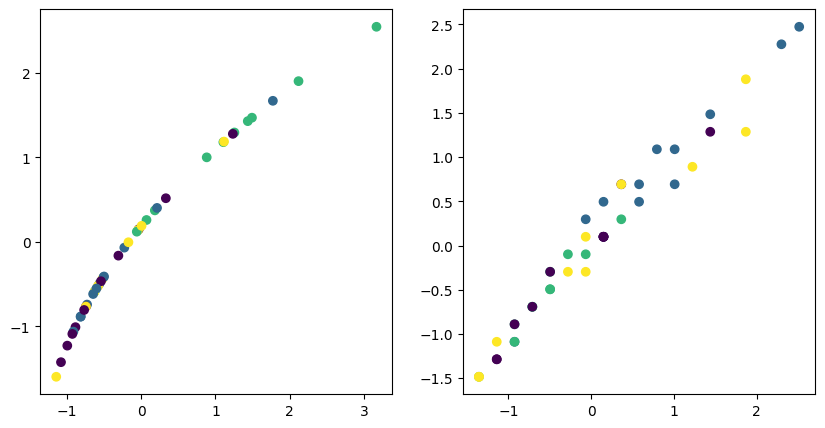

In [289]:
# aplicação da seleção de caracteristicas

# codigo
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split


from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# # Selecionando as 2 melhores caracteristicas
X_test_combined = []
y_test_combined = []
y_pred_combined = []

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(2):
    selector = SelectKBest(f_classif, k=2)

    # fit
    selector.fit(normalized_features[i], y)
    # scores
    scores = -np.log10(selector.pvalues_)
    
    feat = selector.transform(normalized_features[i])
    test_feat = selector.transform(normalized_test_features[i])

    

    X_train, X_test, y_train, y_test = train_test_split(feat, y, test_size=0.2, random_state=42)

    plt.sca(ax[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train) #verificando se os dados estão representados corretamente


    clf = SVC(kernel='rbf',  gamma=0.1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    X_test_combined.append(X_test)  
    y_pred_combined.append(y_pred)
    y_test_combined.append(y_test)
  




**Tarefa 5**: Aplicar classificação usando 'svm'

In [290]:
for i in range(2):
    print(f"Acuracia participante {i+1}: ", clf.score(X_test_combined[i], y_test_combined[i])) 

Acuracia participante 1:  0.16666666666666666
Acuracia participante 2:  0.4166666666666667


In [291]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5],
                        'C': [1, 10, 100, 1000]},
                        {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for i in range(2):
    for score in scores:
        clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                            scoring='%s_macro' % score)
        clf.fit(X_train, y_train)
 
        y_true, y_pred = y_test, clf.predict(X_test_combined[i])
        print(classification_report(y_true, y_pred))

        print(f"Melhor acuracia participante {i+1}: ", clf.score(X_test_combined[i], y_test_combined[i]), "\n")


              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.17      0.50      0.25         2
           2       0.25      0.33      0.29         3
           3       0.00      0.00      0.00         4

    accuracy                           0.25        12
   macro avg       0.23      0.29      0.23        12
weighted avg       0.22      0.25      0.21        12

Melhor acuracia participante 1:  0.22916666666666666 

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.17      0.50      0.25         2
           2       0.25      0.33      0.29         3
           3       0.00      0.00      0.00         4

    accuracy                           0.25        12
   macro avg       0.23      0.29      0.23        12
weighted avg       0.22      0.25      0.21        12

Melhor acuracia participante 1:  0.29166666666666663 

              precis

ImportError: cannot import name 'from_estimator' from 'sklearn.metrics' (C:\Users\caio-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\__init__.py)

##